# Forecasting ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Marketing KPIs by day_Site Totals_Pivot table.csv')
df.head()

Date  Visits  Target Visits  Bookings  Target Bookings        CPA  \
0  1-Mar-21   69417          65916       736              468  14.334091   
1  2-Mar-21   73544          64142       652              436  14.980002   
2  3-Mar-21   61954          60433       609              379  14.620952   
3  4-Mar-21   59338          64142       580              436  16.404493   
4  5-Mar-21   81487          62336       652              408  17.005477   

   Target CPA         Spend  Target Spend        CR  Target CR  
0   18.820513  10549.891150          8808  0.010603   0.007100  
1   18.908257   9766.961133          8244  0.008865   0.006797  
2   18.870712   8904.160063          7152  0.009830   0.006271  
3   18.908257   9514.605781          8244  0.009775   0.006797  
4   18.865196  11087.571030          7697  0.008001   0.006545

In [2]:
'''convert column to datetime format'''
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             761 non-null    datetime64[ns]
 1   Visits           761 non-null    int64         
 2   Target Visits    761 non-null    int64         
 3   Bookings         761 non-null    int64         
 4   Target Bookings  761 non-null    int64         
 5   CPA              761 non-null    float64       
 6   Target CPA       761 non-null    float64       
 7   Spend            761 non-null    float64       
 8   Target Spend     761 non-null    int64         
 9   CR               761 non-null    float64       
 10  Target CR        761 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 65.5 KB


In [3]:
''''çheck for missing values and duplicates'''
print(df.isnull().sum())
print('-'*50)
print(df.duplicated().sum())



Date               0
Visits             0
Target Visits      0
Bookings           0
Target Bookings    0
CPA                0
Target CPA         0
Spend              0
Target Spend       0
CR                 0
Target CR          0
dtype: int64
--------------------------------------------------
0


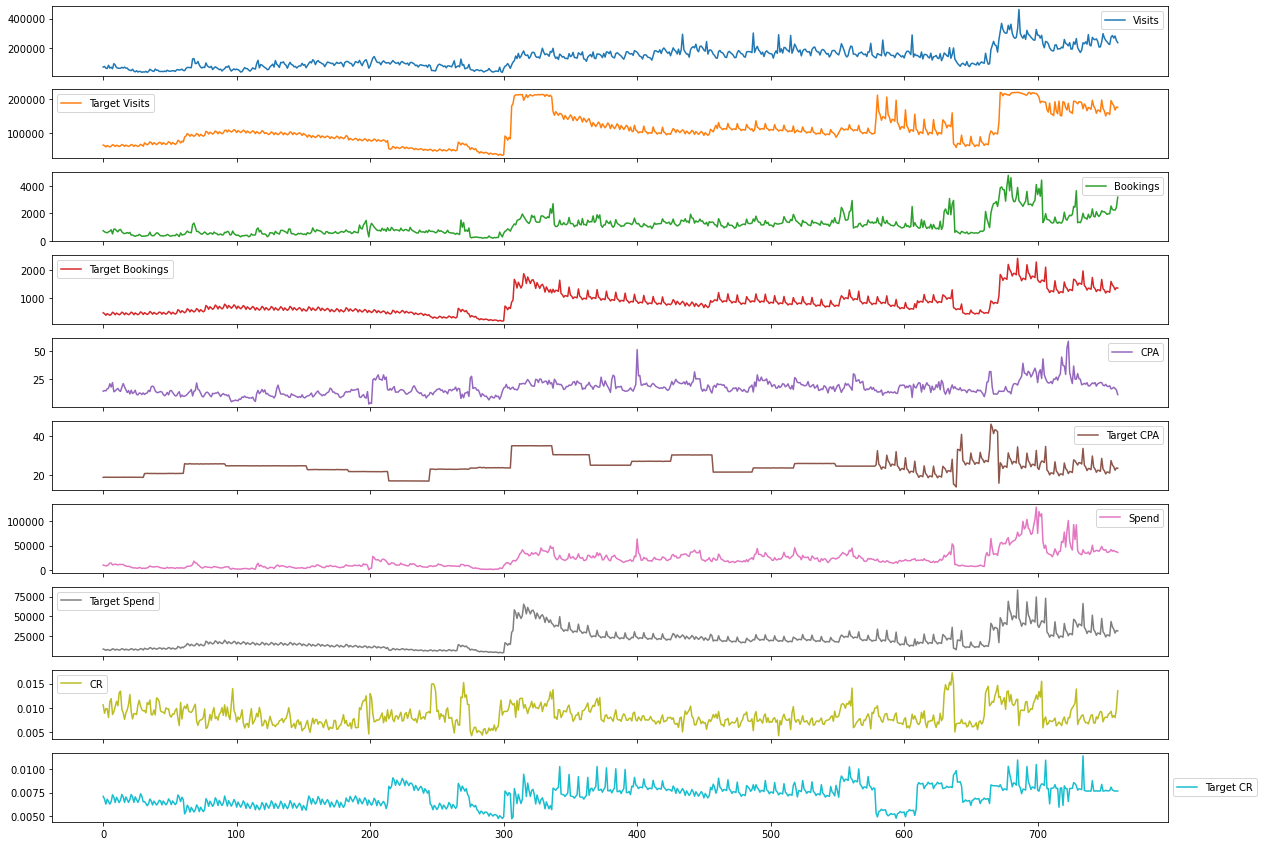

In [4]:
df.iloc[:,1:].plot(figsize=(20,15), subplots=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

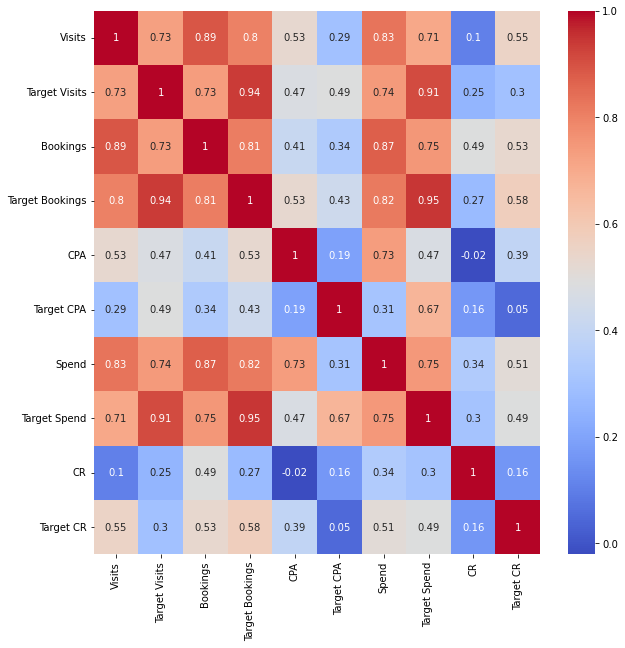

In [5]:
''' correlation matrix '''
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

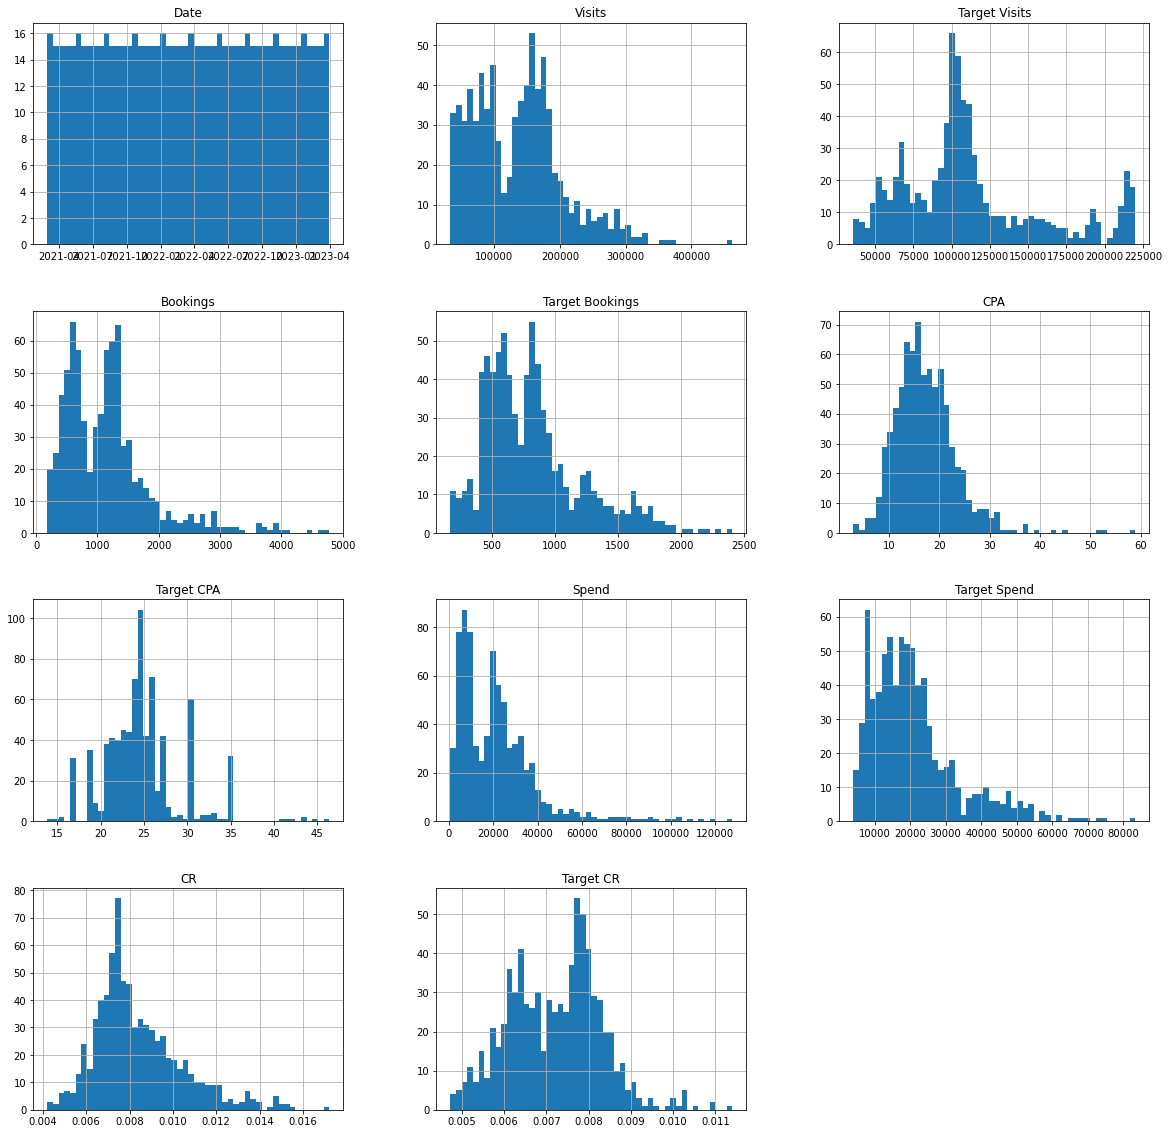

In [6]:
'''histogram of all columns'''
df.hist(figsize=(20,20),bins=50)
plt.show()

Visits                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Target Visits       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Bookings            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Target Bookings     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
CPA                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
Target CPA         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Spend              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Target Spend       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
CR                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
Target CR          AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

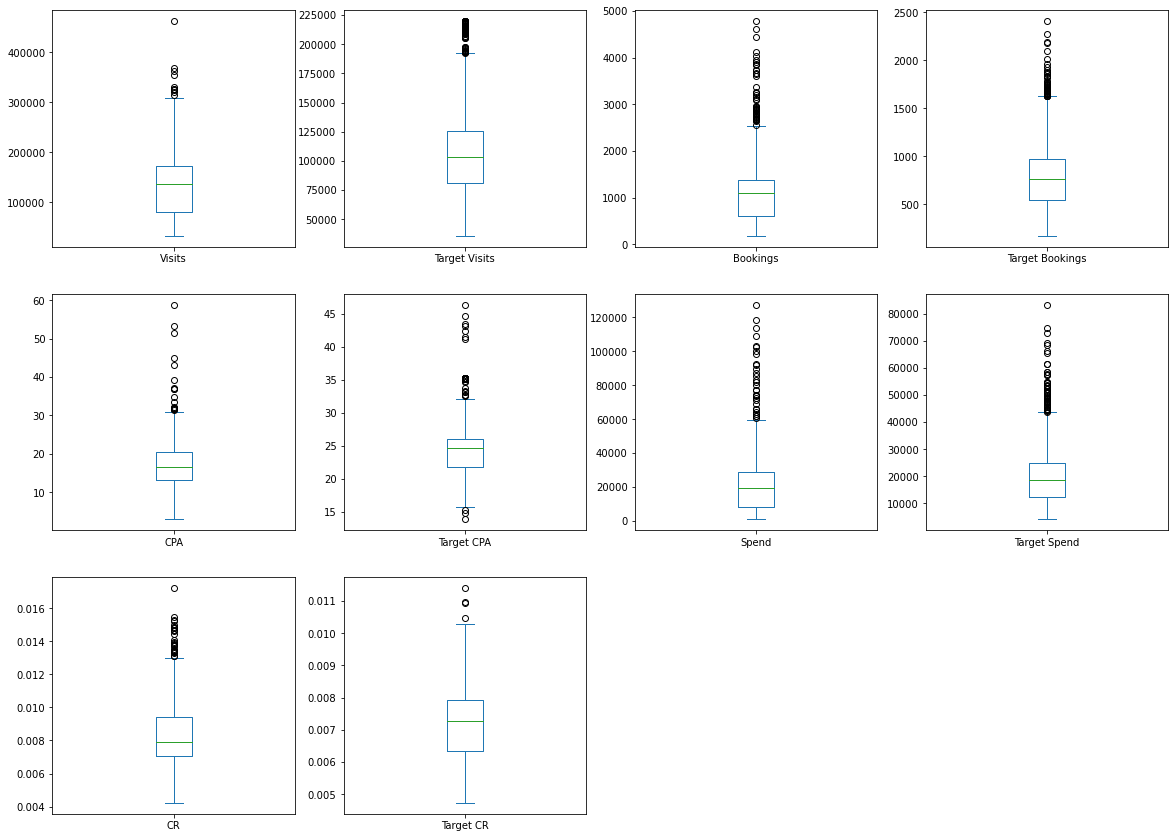

In [7]:
'''boxplot of all columns side by side'''
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))

In [8]:
df.describe()

Visits  Target Visits     Bookings  Target Bookings         CPA  \
count     761.000000     761.000000   761.000000       761.000000  761.000000   
mean   135717.839685  111340.336399  1154.189225       816.275953   17.187372   
std     67903.677936   45004.118393   717.565002       387.111700    6.170866   
min     33025.000000   35839.000000   185.000000       170.000000    2.888153   
25%     80555.000000   81080.000000   616.000000       540.000000   13.201504   
50%    136304.000000  103607.000000  1092.000000       757.000000   16.451215   
75%    173345.000000  125561.000000  1388.000000       973.000000   20.379862   
max    462381.000000  219905.000000  4783.000000      2409.000000   58.910149   

       Target CPA          Spend  Target Spend          CR   Target CR  
count  761.000000     761.000000    761.000000  761.000000  761.000000  
mean    24.736267   21660.704085  20927.387648    0.008399    0.007201  
std      4.412189   18121.199946  12411.467309    0.002032    0.001092  
min     13.845754     817.347321   4057.000000    0.004213    0.004727  
25%     21.839034    8297.531856  12444.000000    0.007071    0.006351  
50%     24.622105   19081.082120  18514.000000    0.007897    0.007290  
75%     26.019108   28915.201820  24949.000000    0.009444    0.007934  
max     46.374860  127602.664700  83374.000000    0.017213    0.011401

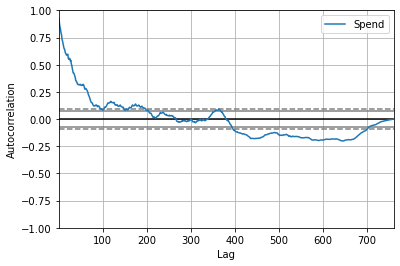

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([0.66193068, 0.66544828, 0.66411361, 0.66473538, 0.66570128,
        0.66762791, 0.66803434, 0.67017021, 0.67865516, 0.68127267,
        0.68768263, 0.69046868, 0.70353451, 0.7129178 , 0.7197187 ,
        0.72587578, 0.7267092 , 0.73292769, 0.73985305, 0.75442022,
        0.764933  , 0.77099366, 0.78445328, 0.78182323, 0.79169897,
        0.7919556 , 0.79561149, 0.79207844, 0.79904176, 0.81233003,
        0.81026982, 0

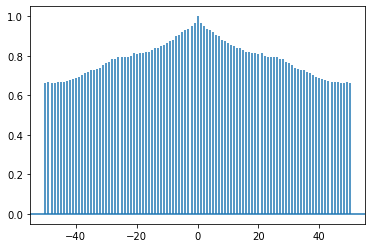

In [9]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Spend'], label='Spend',)
plt.show()

# Plotting the Autocorrelation plot.
plt.acorr(df['Spend'], maxlags = 50)

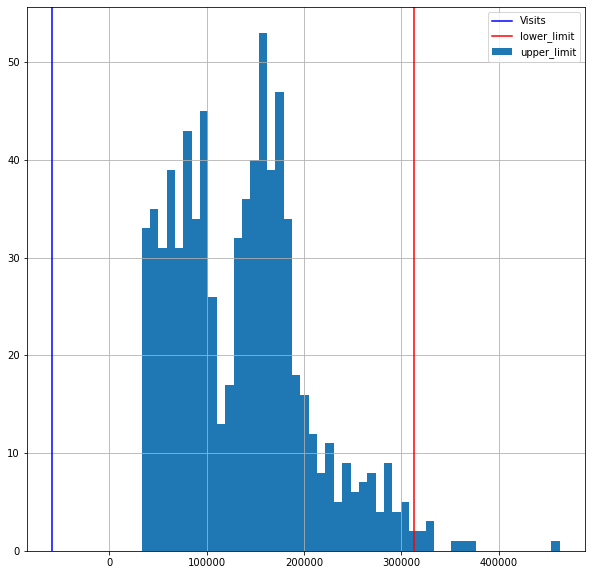

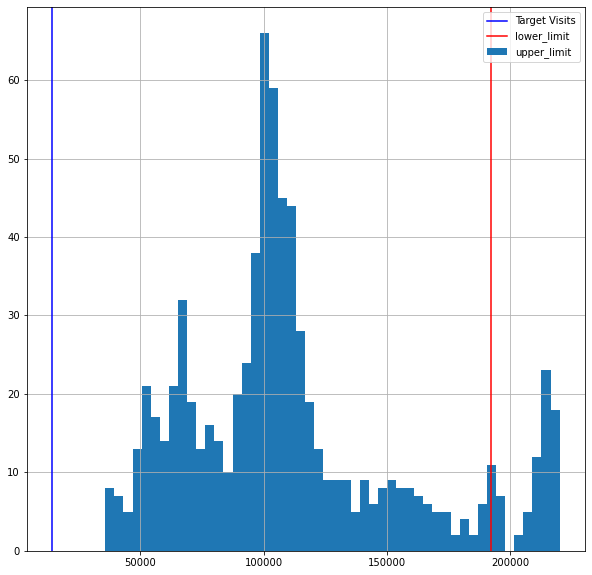

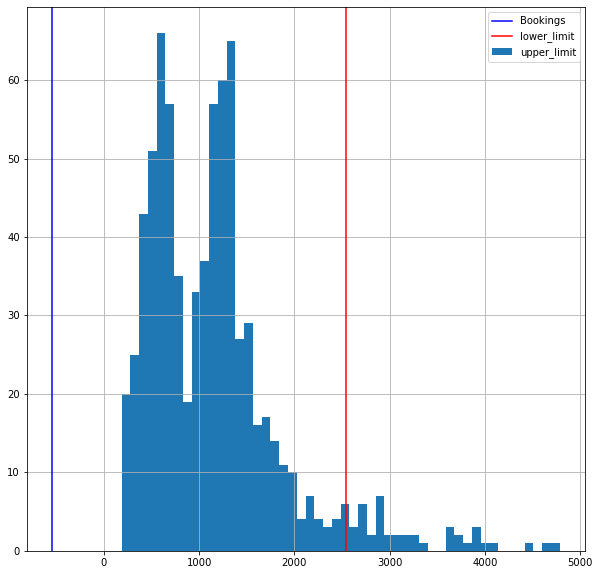

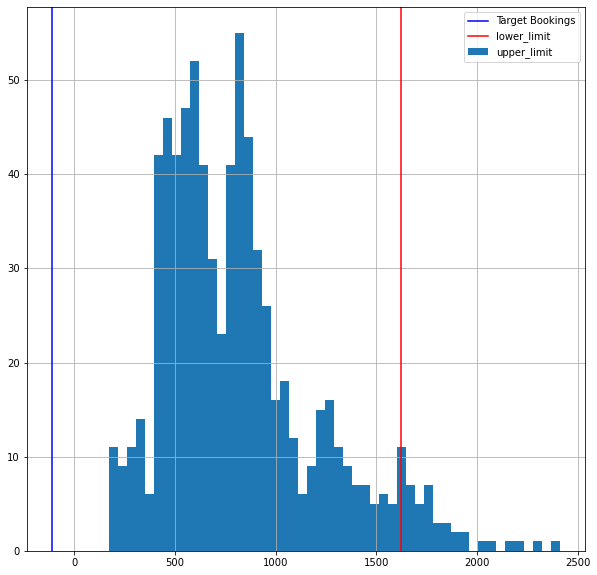

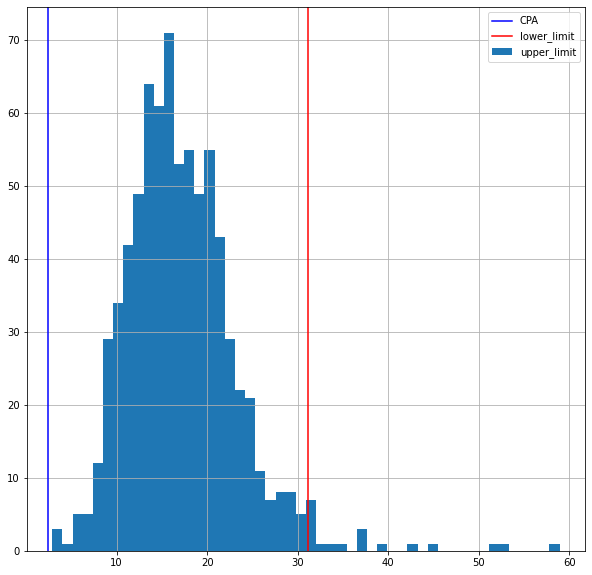

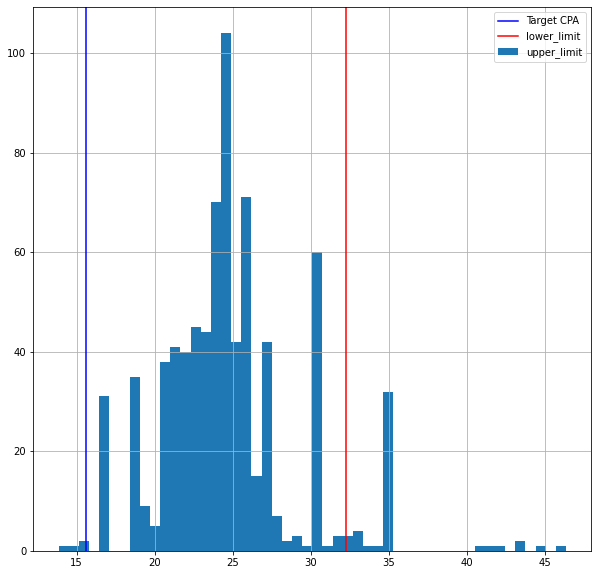

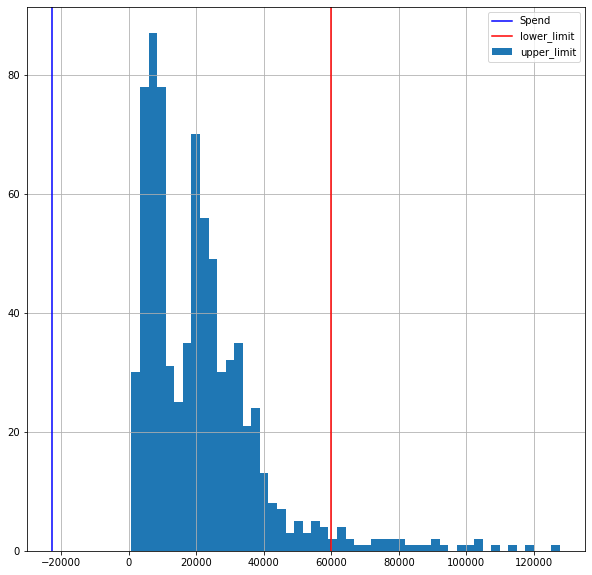

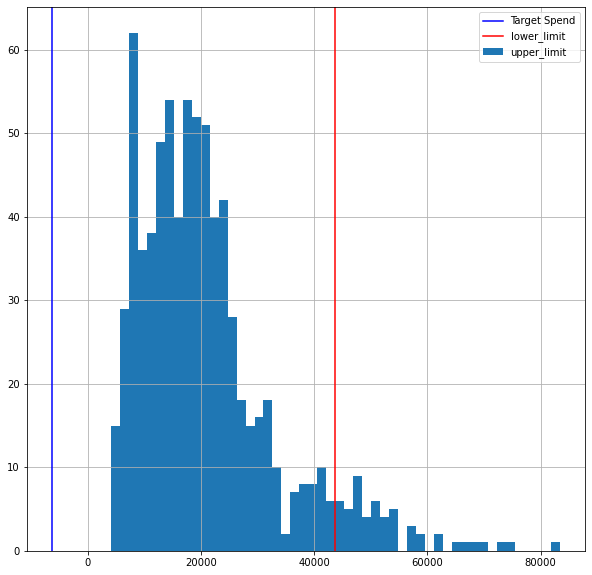

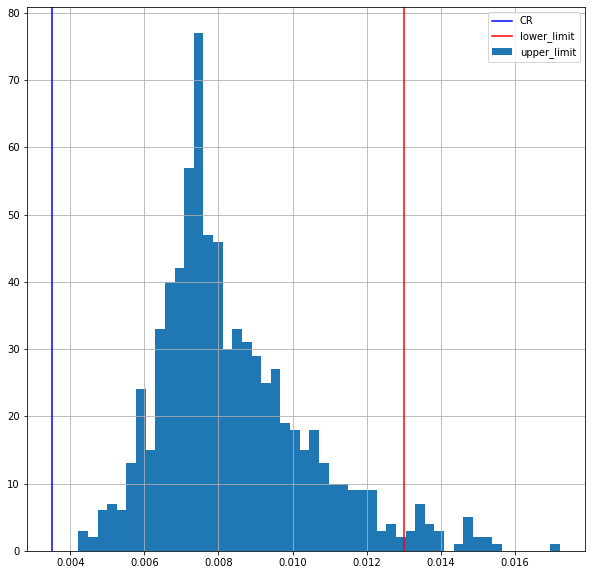

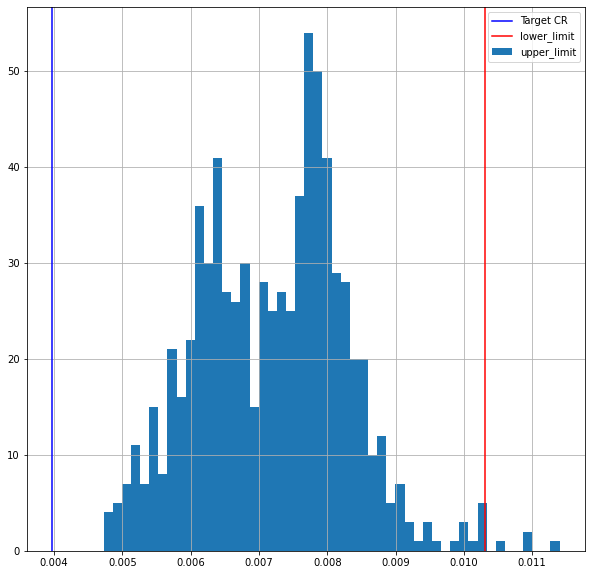

In [10]:
'''find outliers and plot them'''
for i in df.columns[1:]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    plt.figure()
    df[i].hist(figsize=(10,10),bins=50)
    plt.axvline(lower_limit, color = 'blue', label = 'axvline - full height')
    plt.axvline(upper_limit, color = 'red', label = 'axvline - full height')
    plt.legend([i, 'lower_limit', 'upper_limit'])


### Feature Engineering

In [11]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)

conditions = [(df['dayofweek'].eq(5) | df['dayofweek'].eq(6))]
choices = [1]
df['is_weekend'] = np.select(conditions, choices, default=0)

df.drop('Date', axis=1, inplace=True)
df = df[['year', 'month', 'day','dayofweek','is_month_start','is_month_end','is_weekend', 'Target Visits', 'Bookings', 'Target Bookings',
         'CPA', 'Target CPA', 'Target Spend', 'CR', 'Target CR','Visits','Spend']]
df.head()

year  month  day  dayofweek  is_month_start  is_month_end  is_weekend  \
0  2021      3    1          0               1             0           0   
1  2021      3    2          1               0             0           0   
2  2021      3    3          2               0             0           0   
3  2021      3    4          3               0             0           0   
4  2021      3    5          4               0             0           0   

   Target Visits  Bookings  Target Bookings        CPA  Target CPA  \
0          65916       736              468  14.334091   18.820513   
1          64142       652              436  14.980002   18.908257   
2          60433       609              379  14.620952   18.870712   
3          64142       580              436  16.404493   18.908257   
4          62336       652              408  17.005477   18.865196   

   Target Spend        CR  Target CR  Visits         Spend  
0          8808  0.010603   0.007100   69417  10549.891150  
1          8244  0.008865   0.006797   73544   9766.961133  
2          7152  0.009830   0.006271   61954   8904.160063  
3          8244  0.009775   0.006797   59338   9514.605781  
4          7697  0.008001   0.006545   81487  11087.571030

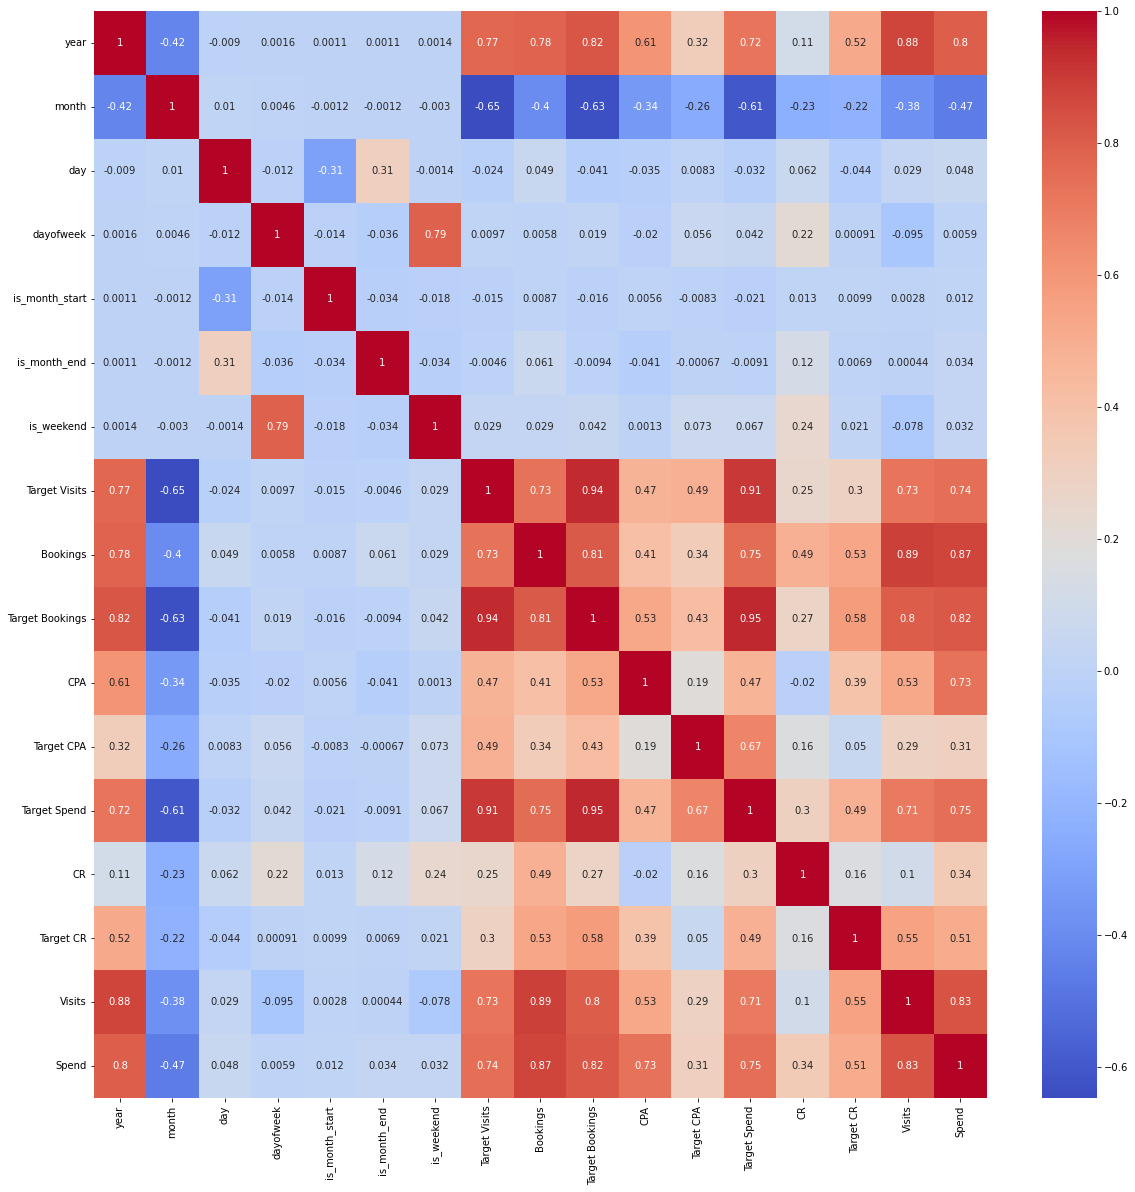

In [12]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

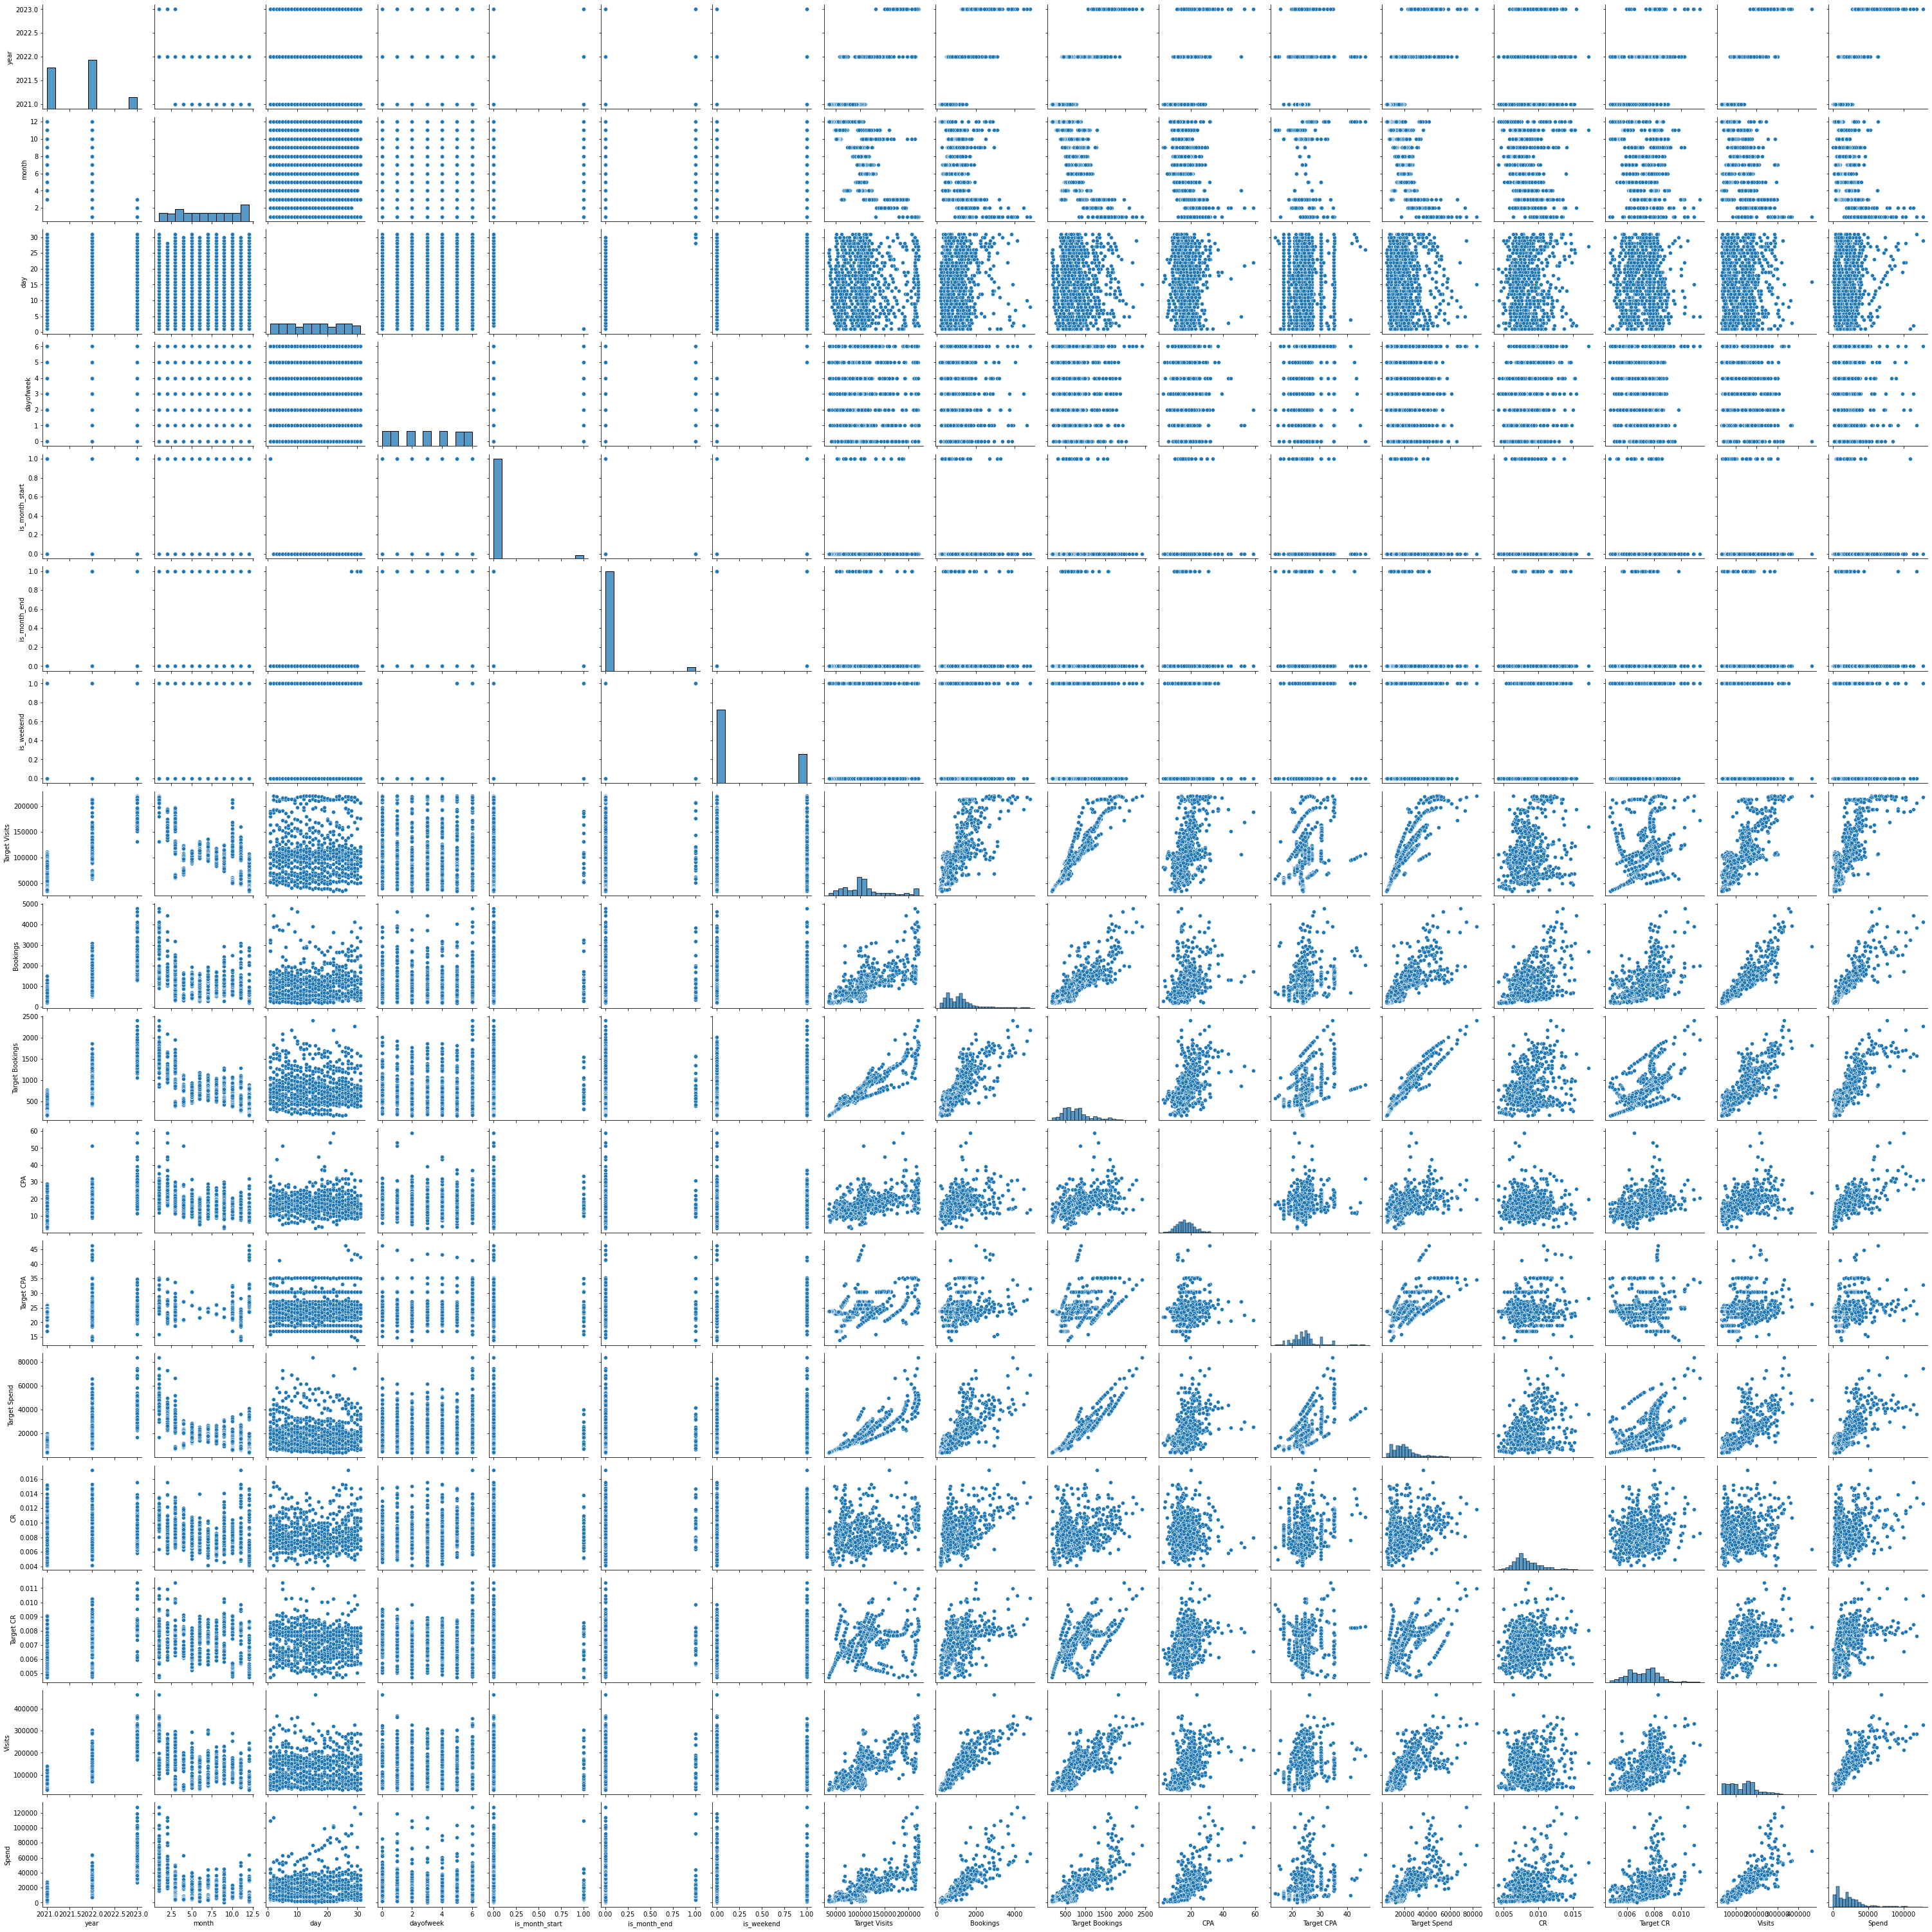

In [13]:
''''non linear correlation among features'''
sns.pairplot(df)
plt.show()

In [14]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df, 10)

FirstVariable   SecondVariable  Correlation
0  Target Bookings     Target Spend     0.947475
1    Target Visits  Target Bookings     0.938878
2    Target Visits     Target Spend     0.909021
3         Bookings           Visits     0.888557
4             year           Visits     0.876814
5         Bookings            Spend     0.872999
6           Visits            Spend     0.828636
7             year  Target Bookings     0.824841
8  Target Bookings            Spend     0.818303
9         Bookings  Target Bookings     0.812203

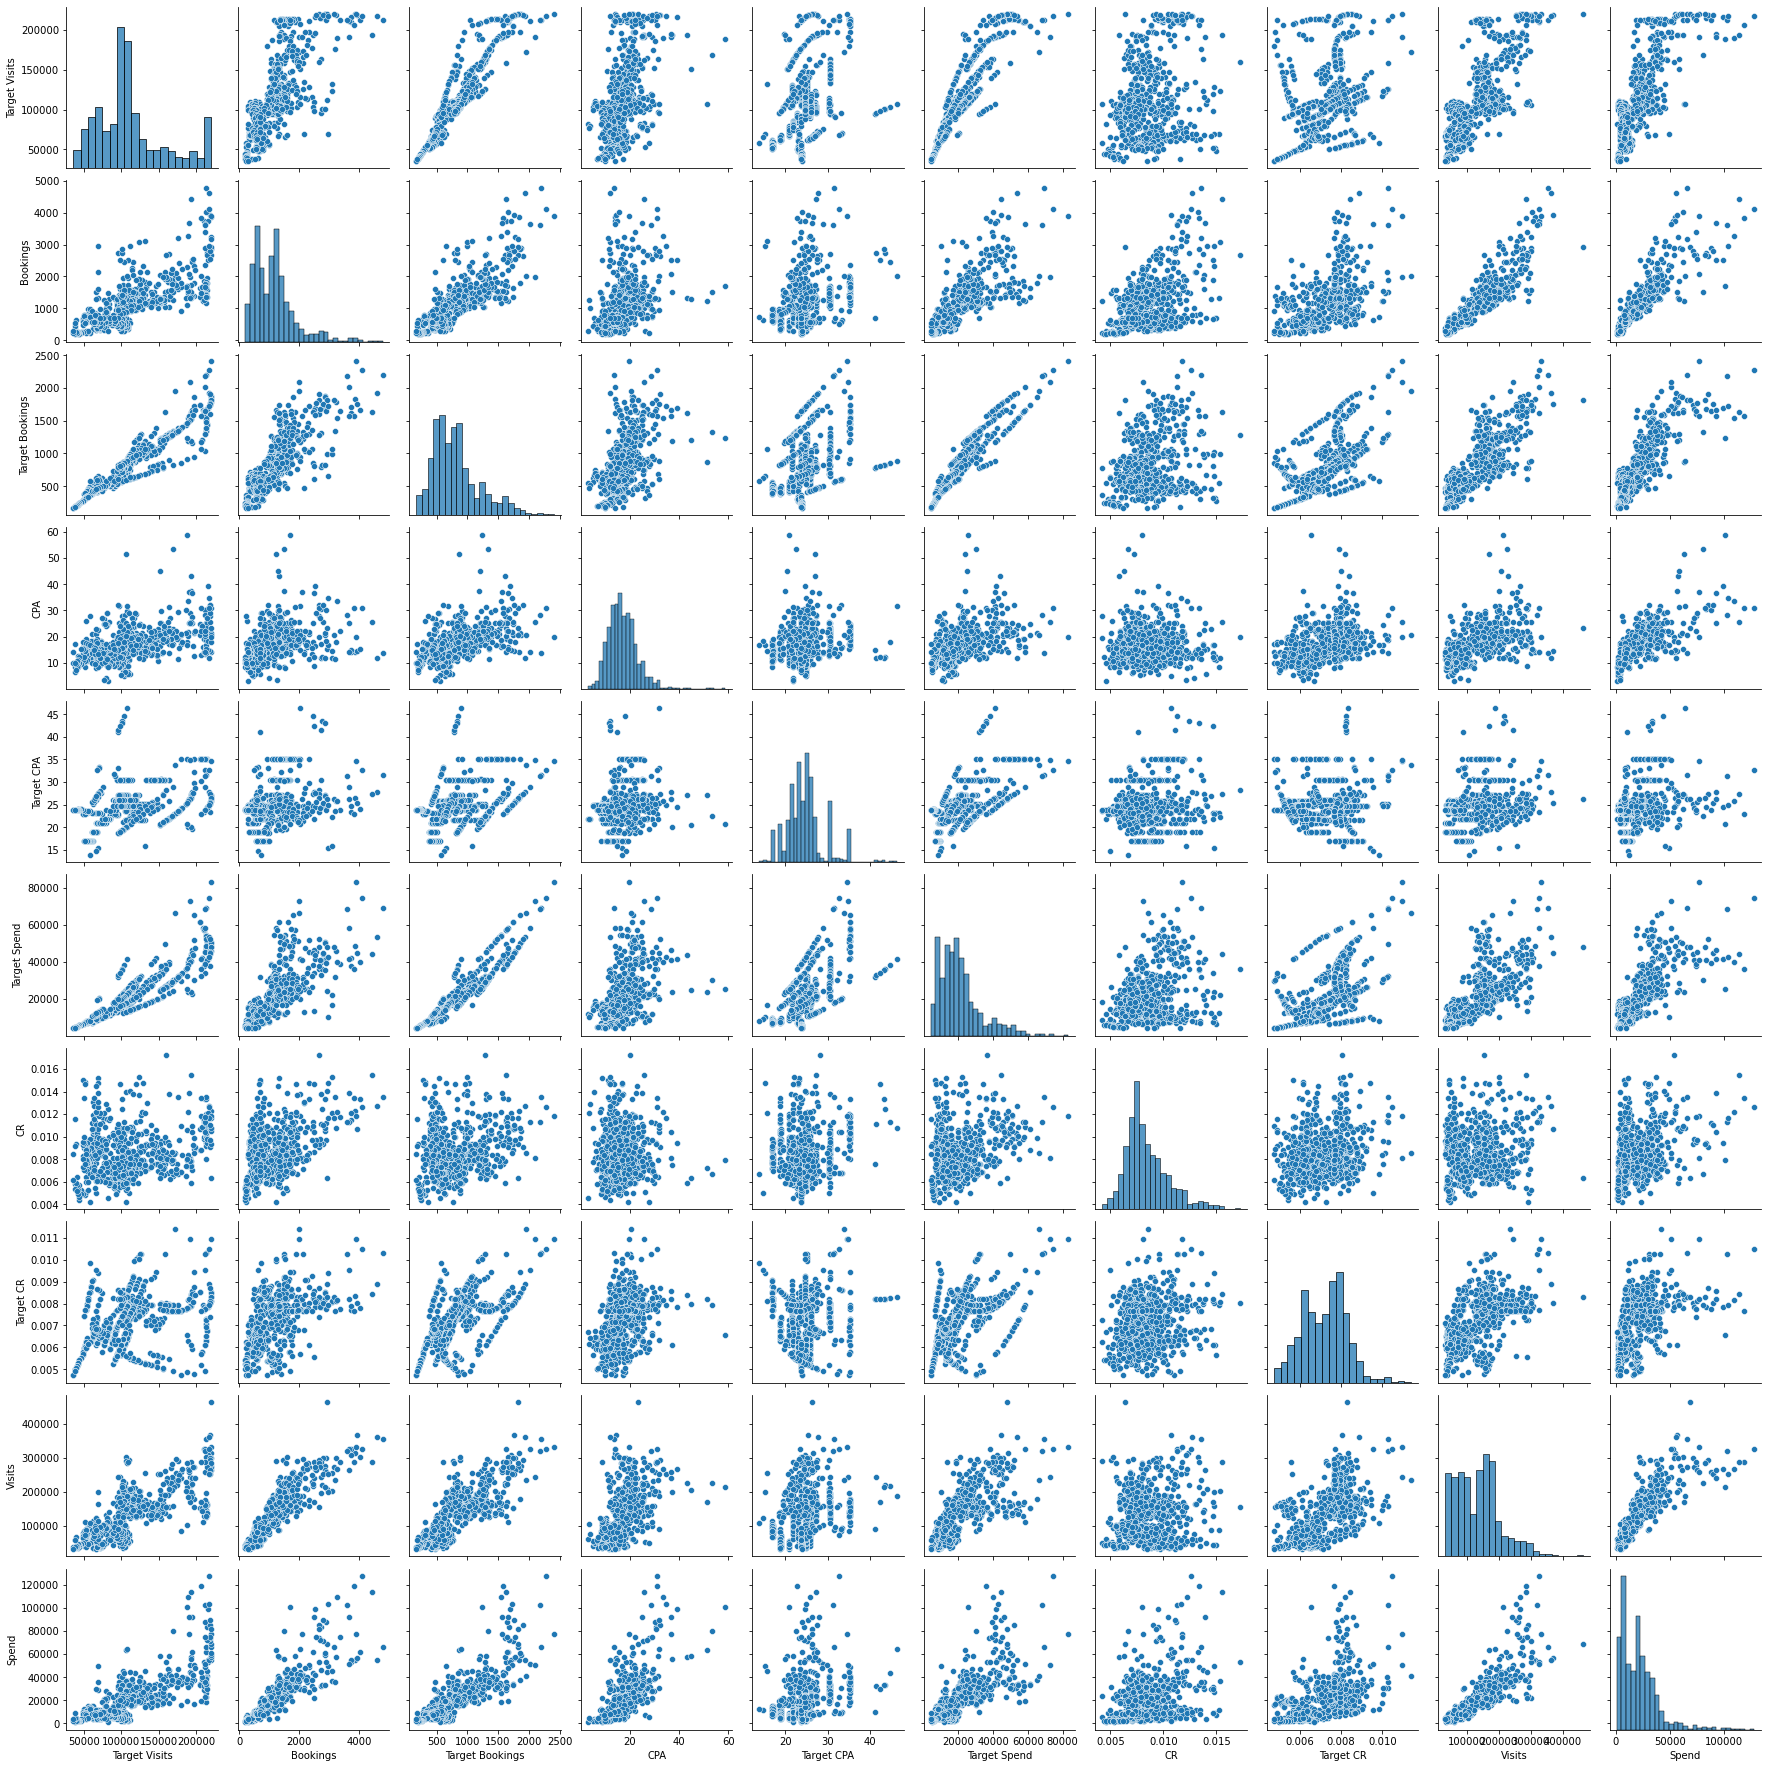

In [15]:
'''keep only the features with correlation >= 0.5'''
df_sample = df[['Target Visits', 'Bookings', 'Target Bookings', 'CPA', 'Target CPA', 'Target Spend', 'CR', 'Target CR', 'Visits', 'Spend']]
sns.pairplot(df_sample)
plt.show()

In [16]:
mosthighlycorrelated(df_sample, 10)

FirstVariable   SecondVariable  Correlation
0  Target Bookings     Target Spend     0.947475
1    Target Visits  Target Bookings     0.938878
2    Target Visits     Target Spend     0.909021
3         Bookings           Visits     0.888557
4         Bookings            Spend     0.872999
5           Visits            Spend     0.828636
6  Target Bookings            Spend     0.818303
7         Bookings  Target Bookings     0.812203
8  Target Bookings           Visits     0.800837
9         Bookings     Target Spend     0.749392

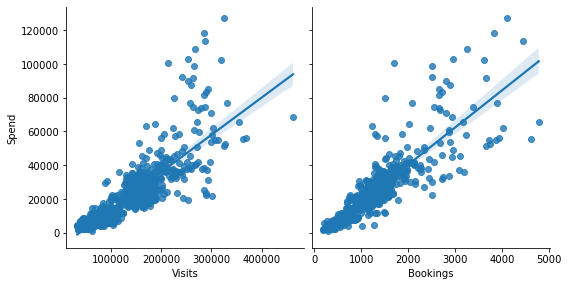

In [17]:
sns.pairplot(df, x_vars=['Visits', 'Bookings'], y_vars='Spend', height=4, aspect=1, kind='reg')
# sns.lmplot("Bookings", "Spend", df, fit_reg=True)


### Prepare data for modeling

In [18]:
df.head()

year  month  day  dayofweek  is_month_start  is_month_end  is_weekend  \
0  2021      3    1          0               1             0           0   
1  2021      3    2          1               0             0           0   
2  2021      3    3          2               0             0           0   
3  2021      3    4          3               0             0           0   
4  2021      3    5          4               0             0           0   

   Target Visits  Bookings  Target Bookings        CPA  Target CPA  \
0          65916       736              468  14.334091   18.820513   
1          64142       652              436  14.980002   18.908257   
2          60433       609              379  14.620952   18.870712   
3          64142       580              436  16.404493   18.908257   
4          62336       652              408  17.005477   18.865196   

   Target Spend        CR  Target CR  Visits         Spend  
0          8808  0.010603   0.007100   69417  10549.891150  
1          8244  0.008865   0.006797   73544   9766.961133  
2          7152  0.009830   0.006271   61954   8904.160063  
3          8244  0.009775   0.006797   59338   9514.605781  
4          7697  0.008001   0.006545   81487  11087.571030

In [17]:
'''train test split'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Spend'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(608, 16) (153, 16) (608,) (153,)


### Baseline model (Random Forest)

RMSE:  2231.2751091168016
MAE:  1185.4964365007938
R2:  0.9832606777397374
CV scores: [-1425.97590619 -1869.99171284 -1714.12311311 -2285.67519982
 -1255.8009895 ]
Mean CV scores: -1710.313384292019


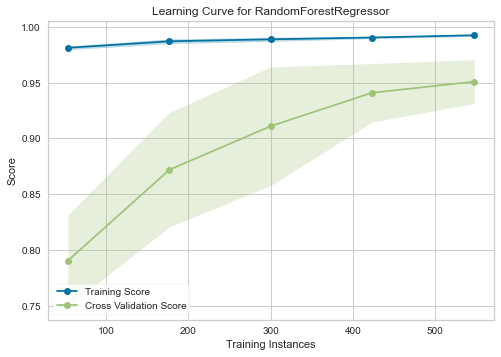

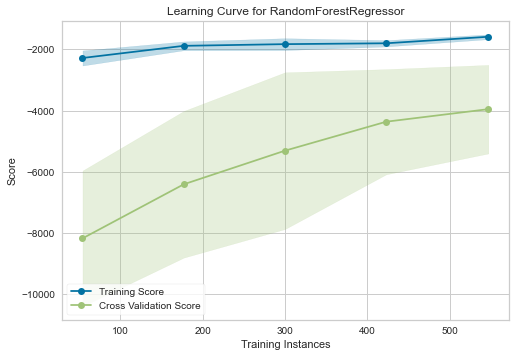

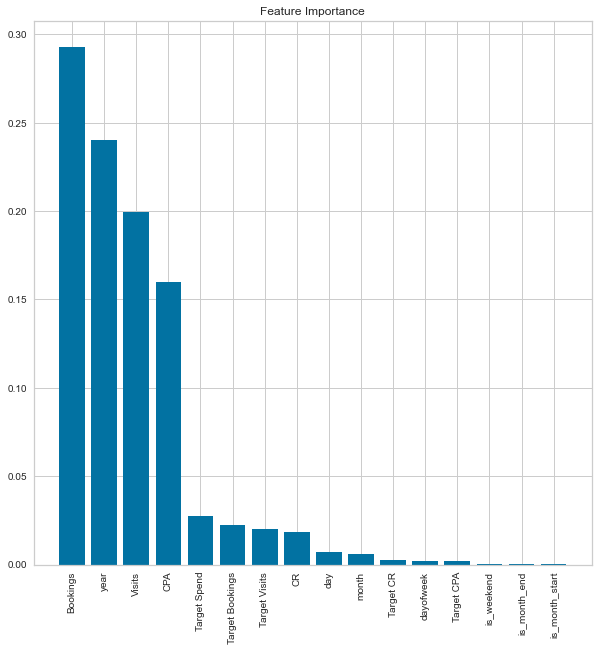

In [18]:
'''random forest regressor'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print(f'CV scores: {cv_scores}')
print(f'Mean CV scores: {cv_scores.mean()}')


from yellowbrick.model_selection import learning_curve
learning_curve(rf, X_train, y_train, cv=10, scoring='r2')
learning_curve(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')


'''feature importance'''
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

(608, 4) (153, 4) (608,) (153,)
RMSE:  2315.6909532060695
MAE:  970.3916046647945
R2:  0.9819701203882231
CV:  0.956792521232279


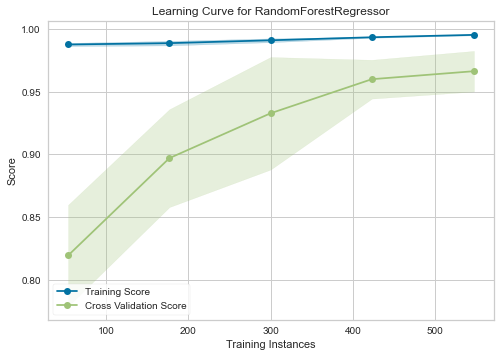

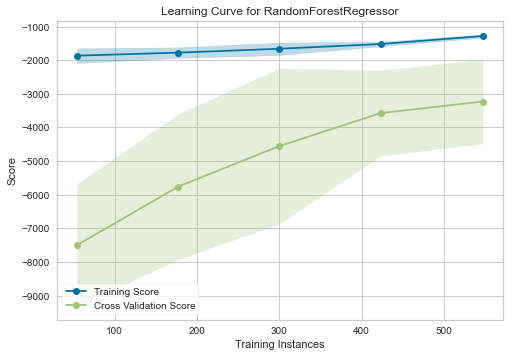

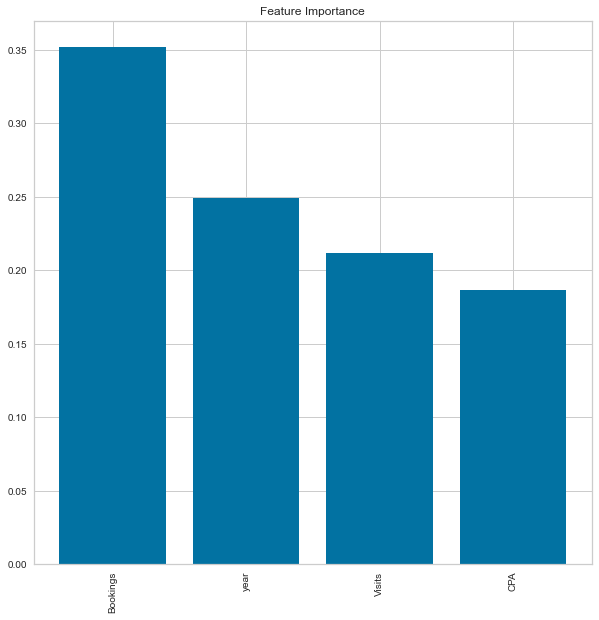

In [19]:
df_selected = df[["Bookings","year","Visits","CPA"]]

X_train, X_test, y_train, y_test = train_test_split(df_selected, df['Spend'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('CV: ', cross_val_score(rf, X_train, y_train, cv=5).mean())

from yellowbrick.model_selection import learning_curve
learning_curve(rf, X_train, y_train, cv=10, scoring='r2')
learning_curve(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

'''feature importance'''
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [20]:
df['Spend'].describe()	

count       761.000000
mean      21660.704085
std       18121.199946
min         817.347321
25%        8297.531856
50%       19081.082120
75%       28915.201820
max      127602.664700
Name: Spend, dtype: float64

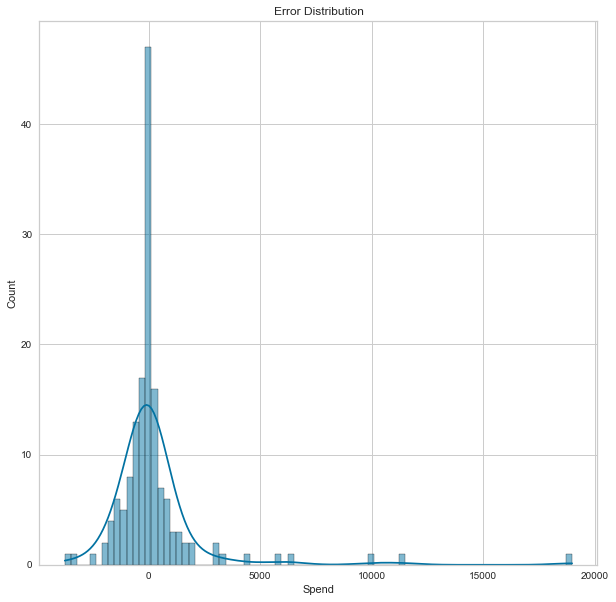

In [21]:
'''Plot error distribution'''
plt.figure(figsize=(10,10))
plt.title("Error Distribution")
errors = y_test - y_pred
# sns.distplot(errors)
sns.histplot(errors,kde=True)
plt.show()

In [22]:
errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
errors["diff"] = errors["Actual"] - errors["Predicted"]
errors.describe()

Actual     Predicted          diff
count    153.000000    153.000000    153.000000
mean   22499.555486  22239.165198    260.390289
std    17302.470082  16244.011136   2308.561137
min      817.347321   2035.898564  -3761.354921
25%     8700.920679   8535.509025   -454.725161
50%    19689.610390  20263.935198    -55.306829
75%    29884.496400  29878.475188    291.643083
max    92315.281010  87493.638494  18974.280579

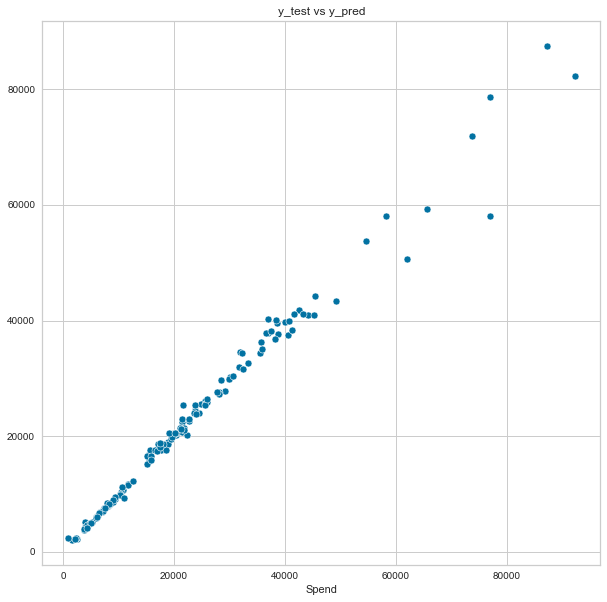

In [23]:
'''plot y_test vs y_pred'''
plt.figure(figsize=(10,10))
plt.title("y_test vs y_pred")
sns.scatterplot(y_test, y_pred)
plt.show()


Pearsons correlation: 0.993
Pearsons p_Val: 0.0000000


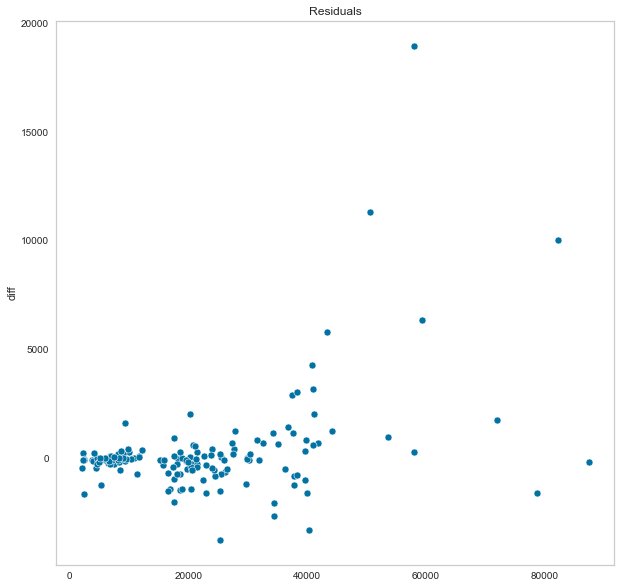

In [24]:
'''pearson correlation'''
from scipy.stats import pearsonr
corr, p_val = pearsonr(y_test, y_pred)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p_Val: %.7f' % p_val)

'''plot residuals'''
plt.figure(figsize=(10,10))
plt.title("Residuals")
sns.scatterplot(y_pred, errors["diff"])
plt.grid()
plt.show()


# Forecasting Timeseries

In [25]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=None)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # # Formatting
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration")
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

class BlockingTimeSeriesSplit():
    def __init__(self, n_splits, X, y):
        self.n_splits = n_splits
        self.X = X
        self.y = y
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(self.X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [31]:
## add lagged Spend as a feature
df_ = df.copy()
for col in df_.columns:
    df_[col+'_Lag1'] = df_[col].shift(1)
    df_[col+'_Lag2'] = df_[col].shift(2)
    df_[col+'_Lag3'] = df_[col].shift(3)
    df_[col+'_Lag4'] = df_[col].shift(4)
    df_[col+'_Lag5'] = df_[col].shift(5)

In [32]:
df_.dropna(inplace=True)
df_.reset_index(drop=True, inplace=True)

In [37]:
X = df_.drop(columns=['Spend'])
y = df_['Spend']

In [40]:
features = X.columns

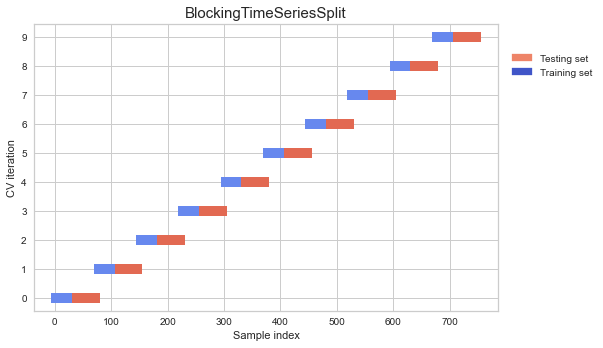

In [80]:
n_splits = 10
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

this_cv = BlockingTimeSeriesSplit(n_splits=n_splits, X=X, y=y)
fig, ax = plt.subplots(figsize=(10, 5))
plot_cv_indices(this_cv, X, y, ax, n_splits)

ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
        ['Testing set', 'Training set'], loc=(1.02, .8))
plt.tight_layout()
fig.subplots_adjust(right=.7)
        
plt.show()

In [89]:
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as ltb

## all features

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# rf = ltb.LGBMRegressor()
# tscv = TimeSeriesSplit(n_splits=n_splits)
rmse = -cross_val_score(rf, X, y, cv=this_cv, scoring='neg_root_mean_squared_error')
R2 = cross_val_score(rf, X, y, cv=this_cv, scoring='r2')

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()}")
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")

RMSE: 6374.058625683245 (+/- 4920.083891083069

R2: 0.051980557263124526 (+/- 0.6155691944743681


In [49]:
selected_features = ['year',
                    'Bookings',
                    'CPA',
                    'Visits',
                    'year_Lag1',
                    'year_Lag2',
                    'year_Lag3',
                    'year_Lag4',
                    'year_Lag5',
                    'Bookings_Lag1',
                    'Bookings_Lag2',
                    'Bookings_Lag3',
                    'Bookings_Lag4',
                    'Bookings_Lag5',
                    'CPA_Lag1',
                    'CPA_Lag2',
                    'CPA_Lag3',
                    'CPA_Lag4',
                    'CPA_Lag5',
                    'Visits_Lag1',
                    'Visits_Lag2',
                    'Visits_Lag3',
                    'Visits_Lag4',
                    'Visits_Lag5',
                    'Spend_Lag1',
                    'Spend_Lag2',
                    'Spend_Lag3',
                    'Spend_Lag4',
                    'Spend_Lag5']

In [75]:
selected_features = ['Bookings','Visits','CPA','year','Spend_Lag1']

In [92]:
## Selected features

# X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, shuffle=False)
this_cv = BlockingTimeSeriesSplit(n_splits=n_splits, X=X[selected_features], y=y)

rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
# rf = ltb.LGBMRegressor()
# tscv = TimeSeriesSplit(n_splits=n_splits)
rmse = -cross_val_score(rf, X[selected_features], y, cv=this_cv, scoring='neg_root_mean_squared_error')
R2 = cross_val_score(rf, X[selected_features], y, cv=this_cv, scoring='r2')

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()}")
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")

RMSE: 5004.31521560048 (+/- 4243.365437665437

R2: 0.4652303033615424 (+/- 0.31692066280098896


In [93]:
rmse

array([ 1543.13199673,   923.07628517,  6608.27743859,  3538.17482149,
        3426.80894352,  4163.33375535,  2441.7156832 ,  2499.9410971 ,
        9302.01476039, 15596.67737447])

In [94]:
R2

array([ 0.78884632,  0.75991387, -0.23261079,  0.28765258,  0.36167495,
        0.55915044,  0.77376357,  0.33839326,  0.79048078,  0.22503806])

## Grid Search

In [95]:
import gc
gc.collect()

5429

In [96]:
from sklearn.model_selection import GridSearchCV

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, best_params):
    
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(f"Grid Search Best Params: {best_params}", fontsize=12, fontweight='medium')
    ax.set_xlabel(name_param_1, fontsize=12)
    ax.set_ylabel('CV Average Score', fontsize=12)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    ax.legend(bbox_to_anchor=(1.02, 1.02))


n_splits = 10

this_cv = BlockingTimeSeriesSplit(n_splits=n_splits, X=X[selected_features], y=y)

params = {
    'n_estimators':(50, 100, 400, 500),
    'max_depth':(None, 5, 7, 9, 10)
    }

scores0 = []
for i in range(20):
    model = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1)
    
    finder0 = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        cv=this_cv,  # change this to the splitter subject to test
        verbose=1
        )

    finder0.fit(X[selected_features].values, y)

    best_params0 = finder0.best_params_
    best_score0 = round(finder0.best_score_,4)
    scores0.append(best_score0)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 2

In [97]:
finder0.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


Blocking time series splitter best score: -4884.1025


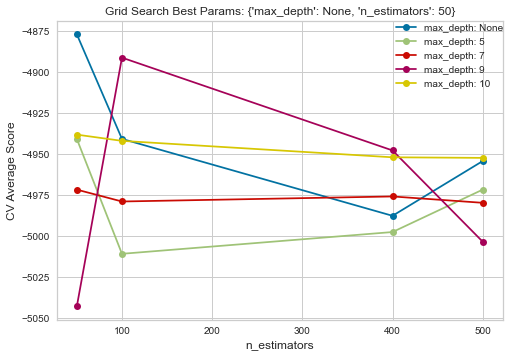

In [98]:
scores01 = pd.DataFrame(scores0)
bs0 = round(float(scores01.mean()),4)
print(f'\nBlocking time series splitter best score: {bs0}')

plot_grid_search(finder0.cv_results_, params['n_estimators'], params['max_depth'], 
                 'n_estimators', 'max_depth', best_params0)

In [99]:
rf = RandomForestRegressor(n_estimators=50, max_depth=None, random_state=42)

n_splits = 10
this_cv = BlockingTimeSeriesSplit(n_splits=n_splits, X=X[selected_features], y=y)

# tscv = TimeSeriesSplit(n_splits=n_splits)
rmse = -cross_val_score(rf, X[selected_features].values, y, cv=this_cv, scoring='neg_root_mean_squared_error')
R2 = cross_val_score(rf, X[selected_features].values, y, cv=this_cv, scoring='r2')

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()}")
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")

RMSE: 4965.471677982123 (+/- 4162.574483490076

R2: 0.46937543544458277 (+/- 0.3153258052338972


In [100]:
rmse

array([ 1536.96200613,   937.55034235,  6591.59575992,  3512.12446281,
        3587.64157161,  4042.49764744,  2373.82302546,  2458.70844368,
        9392.22005788, 15221.59346252])

In [101]:
R2

array([ 0.79053148,  0.75232562, -0.22639553,  0.2981035 ,  0.30035102,
        0.58436941,  0.7861698 ,  0.36003764,  0.78639749,  0.26186392])

# Multivariate Timeseries Forecasting

In [19]:
selected_features = ['Bookings','Visits','CPA','year','Spend']

In [21]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=50,max_depth=None)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	rmse_error = mean_squared_error(test[:, -1], predictions, squared=False)
	R2 = r2_score(test[:, -1], predictions)
	mape = np.mean(np.abs((test[:, -1] - predictions) / test[:, -1])) * 100
	return error, rmse_error, R2, mape, test[:, -1], predictions, history

# transform the time series data into supervised learning

maes = []
rmses = []
r2s = []
mapes = []
for lag in [1,2,3,4,5]:
	data = series_to_supervised(df[selected_features], n_in=lag)
	mae, rmse, r2, mape, y, yhat, _ = walk_forward_validation(data, int(0.2*len(data)))
	maes.append(mae)
	rmses.append(rmse)
	r2s.append(r2)
	mapes.append(mape)

>expected=19325.0, predicted=20602.7
>expected=20357.5, predicted=19890.2
>expected=20098.7, predicted=20348.5
>expected=20253.8, predicted=20506.0
>expected=21155.7, predicted=22148.1
>expected=19648.8, predicted=20505.7
>expected=23272.0, predicted=23577.2
>expected=20726.4, predicted=21720.5
>expected=19478.2, predicted=19934.1
>expected=19539.4, predicted=19690.8
>expected=18048.0, predicted=18793.6
>expected=16023.4, predicted=16118.3
>expected=16222.2, predicted=18294.7
>expected=18390.7, predicted=17408.9
>expected=15598.0, predicted=17371.6
>expected=17681.8, predicted=17850.3
>expected=16304.6, predicted=18048.6
>expected=19167.5, predicted=18846.3
>expected=22394.2, predicted=22503.7
>expected=19919.8, predicted=21864.3
>expected=22862.7, predicted=21582.6
>expected=30508.1, predicted=23877.3
>expected=26894.3, predicted=35664.6
>expected=29854.7, predicted=27934.7
>expected=32409.7, predicted=31858.4
>expected=36961.8, predicted=35816.4
>expected=31632.6, predicted=35226.0
>

Text(0.5, 1.0, 'MAPE for different lags')

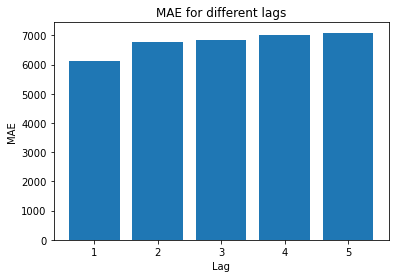

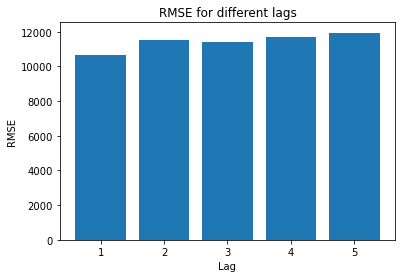

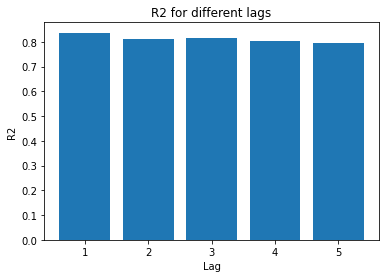

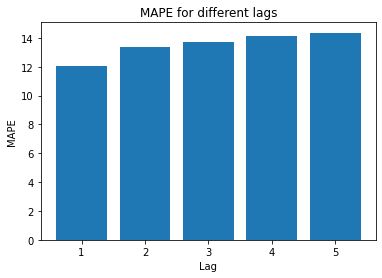

In [22]:
plt.bar([1,2,3,4,5], maes, label='MAE')
plt.ylabel('MAE')
plt.xlabel('Lag')
plt.title('MAE for different lags')
plt.figure()
plt.bar([1,2,3,4,5], rmses, label='RMSE')
plt.ylabel('RMSE')
plt.xlabel('Lag')
plt.title('RMSE for different lags')
plt.figure()
plt.bar([1,2,3,4,5], r2s, label='R2')
plt.ylabel('R2')
plt.xlabel('Lag')
plt.title('R2 for different lags')
plt.figure()
plt.bar([1,2,3,4,5], mapes, label='MAPE')
plt.ylabel('MAPE')
plt.xlabel('Lag')
plt.title('MAPE for different lags')


In [31]:
data = series_to_supervised(df[selected_features], n_in=1) # lag=1
mae, rmse, r2, mape, y, yhat, final_df = walk_forward_validation(data, int(0.2*len(data)))

>expected=19325.0, predicted=20597.4
>expected=20357.5, predicted=19569.1
>expected=20098.7, predicted=20869.1
>expected=20253.8, predicted=20326.7
>expected=21155.7, predicted=21784.7
>expected=19648.8, predicted=21319.4
>expected=23272.0, predicted=22696.8
>expected=20726.4, predicted=21265.8
>expected=19478.2, predicted=19864.5
>expected=19539.4, predicted=19734.6
>expected=18048.0, predicted=18742.3
>expected=16023.4, predicted=16576.7
>expected=16222.2, predicted=18582.4
>expected=18390.7, predicted=17589.9
>expected=15598.0, predicted=17324.0
>expected=17681.8, predicted=17780.5
>expected=16304.6, predicted=17714.6
>expected=19167.5, predicted=19456.8
>expected=22394.2, predicted=22868.4
>expected=19919.8, predicted=22633.1
>expected=22862.7, predicted=21637.7
>expected=30508.1, predicted=25438.9
>expected=26894.3, predicted=35018.0
>expected=29854.7, predicted=27620.3
>expected=32409.7, predicted=32705.0
>expected=36961.8, predicted=35867.4
>expected=31632.6, predicted=33720.4
>

In [75]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')

MAE: 5996.732201524343
RMSE: 10667.626813194696
R2: 0.8365800307403177
MAPE: 11.931853014726405


In [49]:
data.shape

(760, 10)

In [55]:
selected_features

['Bookings', 'Visits', 'CPA', 'year', 'Spend']

In [58]:
final_df = pd.DataFrame(final_df,columns=['Bookings', 'Visits', 'CPA', 'year', 'Spend','Bookings_lag1',
                                          'Visits_lag1','CPA_lag1', 'year_lag1', 'Spend_lag1'])
final_df.head()

Bookings    Visits        CPA    year         Spend  Bookings_lag1  \
0       736.0   69417.0  14.334091  2021.0  10549.891150          652.0   
1       652.0   73544.0  14.980002  2021.0   9766.961133          609.0   
2       609.0   61954.0  14.620952  2021.0   8904.160063          580.0   
3       580.0   59338.0  16.404493  2021.0   9514.605781          652.0   
4       652.0   81487.0  17.005477  2021.0  11087.571030          700.0   
..        ...       ...        ...     ...           ...            ...   
755    2540.0  273828.0  16.451215  2023.0  41786.087340         2283.0   
756    2283.0  284967.0  16.854437  2023.0  38478.680050         2247.0   
757    2247.0  267657.0  17.811901  2023.0  40023.341120         2243.0   
758    2243.0  281730.0  16.875811  2023.0  37852.443580         2431.0   
759    2431.0  250613.0  15.459100  2023.0  37581.071080         3191.0   

     Visits_lag1   CPA_lag1  year_lag1    Spend_lag1  
0        73544.0  14.980002     2021.0   9766.961133  
1        61954.0  14.620952     2021.0   8904.160063  
2        59338.0  16.404493     2021.0   9514.605781  
3        81487.0  17.005477     2021.0  11087.571030  
4        62381.0  20.979306     2021.0  14685.514220  
..           ...        ...        ...           ...  
755     284967.0  16.854437     2023.0  38478.680050  
756     267657.0  17.811901     2023.0  40023.341120  
757     281730.0  16.875811     2023.0  37852.443580  
758     250613.0  15.459100     2023.0  37581.071080  
759     236049.0  11.295851     2023.0  36045.059110  

[760 rows x 10 columns]

In [68]:
test_set = final_df[-y.shape[0]:].drop(['Bookings_lag1', 'Visits_lag1', 'CPA_lag1', 'year_lag1', 'Spend_lag1'], axis=1).reset_index(drop=True)
test_set['Actual'] = y
test_set['Predicted'] = yhat
dates = pd.to_datetime(df[['year', 'month', 'day']])
test_set['Date'] = dates[-y.shape[0]:].reset_index(drop=True)
test_set

Bookings    Visits        CPA    year        Spend       Actual  \
0      1322.0  158650.0  17.914267  2022.0  23682.66107  19324.95407   
1      1116.0  147491.0  17.316267  2022.0  19324.95407  20357.48256   
2      1008.0  149264.0  20.195915  2022.0  20357.48256  20098.67500   
3       917.0  140561.0  21.917857  2022.0  20098.67500  20253.80940   
4       947.0  134529.0  21.387338  2022.0  20253.80940  21155.72506   
..        ...       ...        ...     ...          ...          ...   
147    2540.0  273828.0  16.451215  2023.0  41786.08734  38478.68005   
148    2283.0  284967.0  16.854437  2023.0  38478.68005  40023.34112   
149    2247.0  267657.0  17.811901  2023.0  40023.34112  37852.44358   
150    2243.0  281730.0  16.875811  2023.0  37852.44358  37581.07108   
151    2431.0  250613.0  15.459100  2023.0  37581.07108  36045.05911   

        Predicted       Date  
0    20597.436574 2022-10-31  
1    19569.092797 2022-11-01  
2    20869.128739 2022-11-02  
3    20326.691581 2022-11-03  
4    21784.694302 2022-11-04  
..            ...        ...  
147  41551.429484 2023-03-27  
148  38742.969200 2023-03-28  
149  40380.920040 2023-03-29  
150  39822.625053 2023-03-30  
151  40503.210444 2023-03-31  

[152 rows x 8 columns]

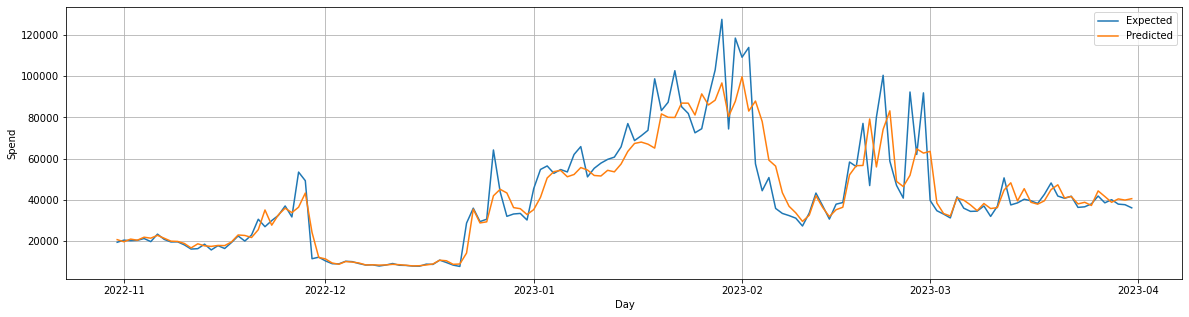

In [69]:
# plot expected vs predicted
plt.figure(figsize=(20,5))
plt.plot(test_set['Date'],y, label='Expected')
plt.plot(test_set['Date'],yhat, label='Predicted')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Spend')
plt.grid()

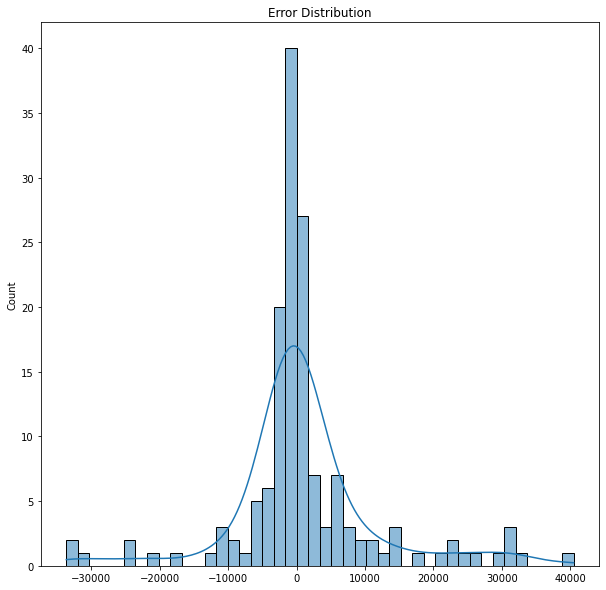

In [74]:
'''Plot error distribution'''
plt.figure(figsize=(10,10))
plt.title("Error Distribution")
errors = y - yhat
# sns.distplot(errors)
sns.histplot(errors,kde=True)
plt.show()

In [71]:
errors = pd.DataFrame({'Actual': y, 'Predicted': yhat})
errors["diff"] = np.abs(errors["Actual"] - errors["Predicted"])
errors["10%"] = errors["Actual"] * 0.1
errors.describe()

Actual     Predicted          diff           10%
count     152.000000    152.000000    152.000000    152.000000
mean    41514.092577  40399.006520   5996.732202   4151.409258
std     26475.768340  23062.921003   8851.719868   2647.576834
min      7583.797801   7843.587757      0.596261    758.379780
25%     20331.564270  21306.025539    615.510244   2033.156427
50%     36966.861575  38055.311970   2238.843528   3696.686158
75%     54830.072692  53564.227276   6373.117628   5483.007269
max    127602.664700  99717.910810  40474.040262  12760.266470

<AxesSubplot:>

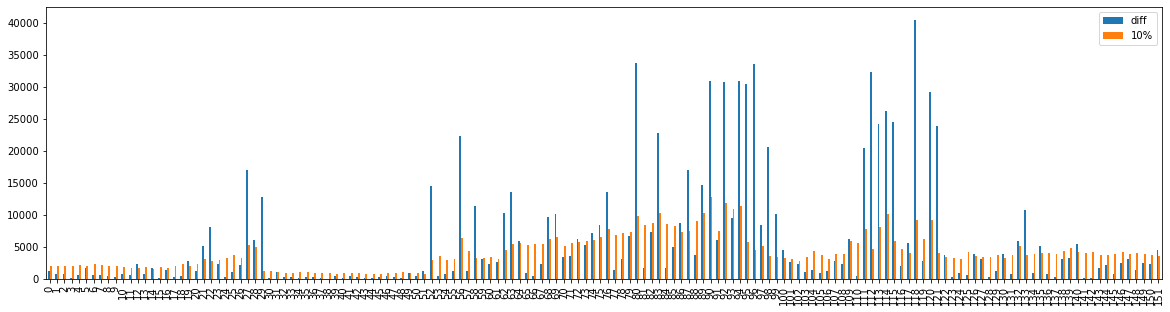

In [72]:
errors[errors.columns[2:]].plot(kind='bar',figsize=(20,5))

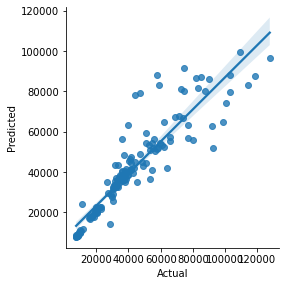

In [73]:
sns.pairplot(errors, x_vars='Actual', y_vars='Predicted', height=4, aspect=1, kind='reg')